#   File: DSC550 Curry Week3 Assignment.py
#   Name: Adam Curry
#   Date: 03/24/2020
#   Course: DSC540 - Data Mining
#   Desc: This program classifies text in a variety of ways
#   Usage: This program should be used when reviewing week 3's assignment

You can create a new analysis scenario or you can use the tutorials you completed this week.

The below analysis uses a Spotify dataset from Spotify's API

In [1]:
# Begin Data Wrangling process from Spotify 
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import requests
import json

# create a spotify object with the connection
# API keys stored in PATH 
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

def artist_uri(s):
    """
    function to to get the artist of interest's albums
    """
    artist = s
    albums = spotify.artist_albums(s, album_type = 'album')
    return artist, albums

# alcest = artist_uri('spotify:artist:5YeoQ1L71cXDMpSpqxOjfH')
# localize the data into lists
alcest_uri, sonata_artica_albums = artist_uri('0d5ZwMtCer8dQdOPAgWhe7')

list_album_data = []
for a in sonata_artica_albums['items']:
    dict_album = {
            'album_name' : None,
            'album_uri' : None,
            'album_group' : None,
            'album_type' : None,
            'album_name' : None,
            'album_available_markets' : None,
            'album_release_date' : None,
            'id_' : None
                    }
    try:
        dict_album['album_name'] = (a['name'])
        dict_album['album_uri'] = (a['uri'])
        dict_album['album_group'] = (a['album_group'])
        dict_album['album_type'] = (a['album_type'])
        dict_album['album_available_markets'] = (a['available_markets'])
        dict_album['album_release_date'] = (a['release_date'])
        dict_album['id_'] = (a['id'])
        list_album_data.append(dict_album)
    except Exception:
        pass   

list_album_specific_data = []
for uri in list_album_data:
    z_response = requests.get('https://t4ils.dev:4433/api/beta/albumPlayCount?albumid={}'.format(uri['id_']))
    list_album_specific_data.append(json.loads(z_response.text))


"""
get the count of track plays into a final list
"""
list_track_count = []
for i, track in enumerate(list_album_specific_data):
    try:
        for t in track['data']:
            dict_track_count = {
            'track_uri' : None,
            'name' : None,
            'playcount' : None
                    }
            dict_track_count['track_uri'] = t['uri']
            dict_track_count['name'] = t['name']
            dict_track_count['playcount'] = t['playcount']
            list_track_count.append(dict_track_count)
    except Exception as e:
        print(e)
        pass

list_album_tracks = []
for track in list_album_data:
    dict_album_tracks = {
            'album_name' : None,
            'album_data' : None,
            'album_uri' : None,
                    }
    try:
        dict_album_tracks['album_name'] = (track['album_name'])
        dict_album_tracks['album_uri'] = (track['album_uri'])
        dict_album_tracks['album_data'] = (spotify.album_tracks(track['album_uri']))
        list_album_tracks.append(dict_album_tracks)
    except Exception:
        pass   

"""
from the population of the playlist tracks, get the track featers from spotify
"""
list_audio_features_ = []
for i, track in enumerate(list_album_tracks):
    try:
        for t in track['album_data']['items']:
            dict_audio = {
            'album_name' : None,
            'album_uri' : None,
            'audio_features' : None
                    }
            dict_audio['audio_features'] = (spotify.audio_features(t['uri']))
            dict_audio['album_uri'] = track['album_uri']
            dict_audio['album_name'] = track['album_name']
            list_audio_features_.append(dict_audio)
    except Exception as e:
        print(e)
        pass

"""
For loop will append each track's audio features to a dict
"""
list_track_data = []
for i, t in enumerate(list_audio_features_):
    dict_track_ = {
        'track_uri' : None,
        'acousticness' : None,
        'danceability' : None,
        'energy' : None,
        'instrumentalness' : None,
        'key' : None,
        'liveness' : None,
        'loudness' : None,
        'speechiness' : None,
        'tempo' : None,
        'time_signature' : None,
        'valence' : None,
        'album_uri': None
        }
    try:
        dict_track_['track_uri'] = (t['audio_features'][0]['uri'])
        dict_track_['acousticness'] = (t['audio_features'][0]['acousticness'])
        dict_track_['danceability'] = (t['audio_features'][0]['danceability'])
        dict_track_['energy'] = (t['audio_features'][0]['energy'])
        dict_track_['instrumentalness'] = (t['audio_features'][0]['instrumentalness'])
        dict_track_['key'] = (t['audio_features'][0]['key'])
        dict_track_['liveness'] = (t['audio_features'][0]['liveness'])
        dict_track_['loudness'] = (t['audio_features'][0]['loudness'])
        dict_track_['speechiness'] = (t['audio_features'][0]['speechiness'])
        dict_track_['tempo'] = (t['audio_features'][0]['tempo'])
        dict_track_['time_signature'] = (t['audio_features'][0]['time_signature'])
        dict_track_['valence'] = (t['audio_features'][0]['valence'])
        dict_track_['album_uri'] = (t['album_uri'])
        list_track_data.append(dict_track_)
    except Exception as e:
        print(e)   
# this function will get the audio analysis, more song related data
#audio_analysis_ = spotify.audio_analysis(Himmelsrand)

df_track_data = pd.DataFrame(list_track_data)
df_album_data = pd.DataFrame(list_album_data)
df_track_count = pd.DataFrame(list_track_count) 

# join the two datasets together
df_final = df_track_data.merge(df_album_data,how='inner',on=['album_uri','album_uri'])\
.merge(df_track_count,how='inner',on=['track_uri','track_uri'])

# drop Japan releases
indexNames = df_final[df_final['album_uri'] == 'spotify:album:0yB03KUiegLE7N8Gf8Q3GB'].index
df_final.drop(indexNames , inplace=True)

# drop dups
df_final.drop_duplicates(subset ="name", 
                     keep = False, inplace = True) 

A. Display the same analysis using 3 different charts (ex. A bar chart, a line chart and a pie chart)

B. Use appropriate, complete, professional labeling 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

df_final['album_release_year'] = pd.to_datetime(df_final['album_release_date'])
df_final['album_release_year'] = df_final['album_release_year'].dt.year

# average each value by album
df_avg = df_final.groupby('album_name').apply(lambda x: x.mean())

# move index back to column var
df_avg = df_avg.reset_index()

# convert the year values to integers
df_avg['album_release_year'] = df_avg['album_release_year'].apply(lambda x: int(x))

# sort the albums by release year
df_avg = df_avg.sort_values(['album_release_year'])

# create variables to be plotted
album_release_year = np.array(df_avg['album_release_year'])
album_name = df_avg['album_name']
tempo = np.array(df_avg['tempo'])
"""
The overall estimated tempo of a track in beats per minute (BPM). 
In musical terminology, tempo is the speed or pace of a given piece and 
derives directly from the average beat duration.	
"""

'\nThe overall estimated tempo of a track in beats per minute (BPM). \nIn musical terminology, tempo is the speed or pace of a given piece and \nderives directly from the average beat duration.\t\n'

### The charts below are ranked form worst use case to best, in order to answer the below question:
C. Rank your charts from most effective to least effective.

Text(0.5, 1.0, 'BPM By Album')

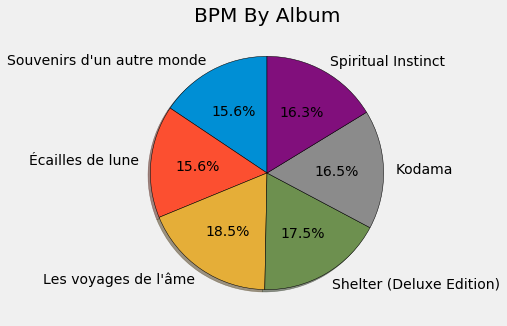

In [3]:
# pie chart
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.pie(tempo, labels = album_name, 
        wedgeprops ={'edgecolor':'black'}
        ,shadow=True
        ,autopct='%1.1f%%'
        # angle the data a touch
        ,startangle=90)
plt.title('BPM By Album')

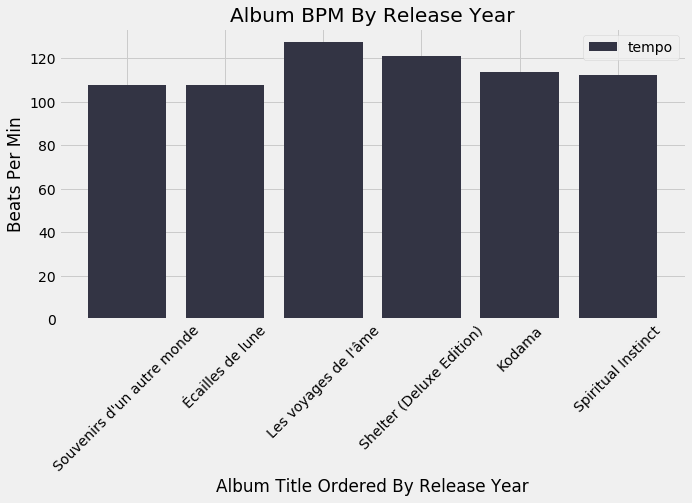

In [4]:
# X bar chart
# use numpy to create album indexes for smoother bar chart
temp_indx = np.arange(len(album_release_year))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.bar(temp_indx, tempo,color='#333444',label = 'tempo')
# sort by album name but include the album title as a label
plt.xticks(temp_indx, album_name, rotation=45)
plt.ylabel('Beats Per Min')
plt.xlabel('Album Title Ordered By Release Year')
plt.title('Album BPM By Release Year')
plt.grid(True)
plt.legend()

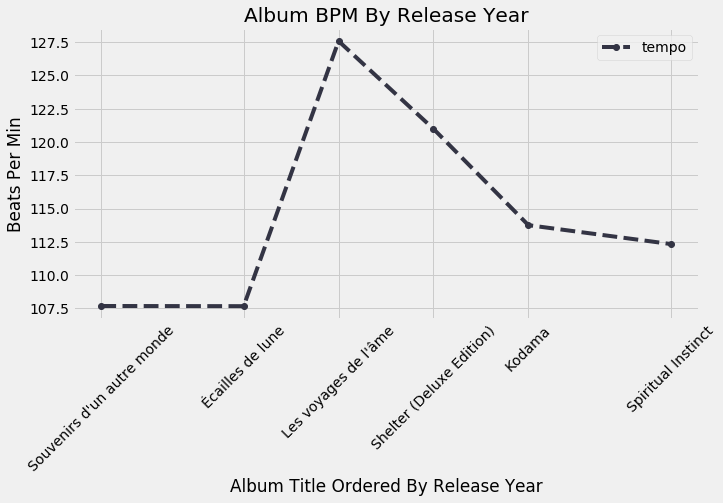

In [5]:
# line chart
# print(plt.style.available)
# utilize predefined styles for final output
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.plot(album_release_year, tempo,marker='o',color='#333444',linestyle='--'\
         ,label = 'tempo')
# sort by album name but include the album title as a label
plt.xticks(album_release_year, album_name, rotation=45)
plt.ylabel('Beats Per Min')
plt.xlabel('Album Title Ordered By Release Year')
plt.title('Album BPM By Release Year')
plt.grid(True)
plt.legend()


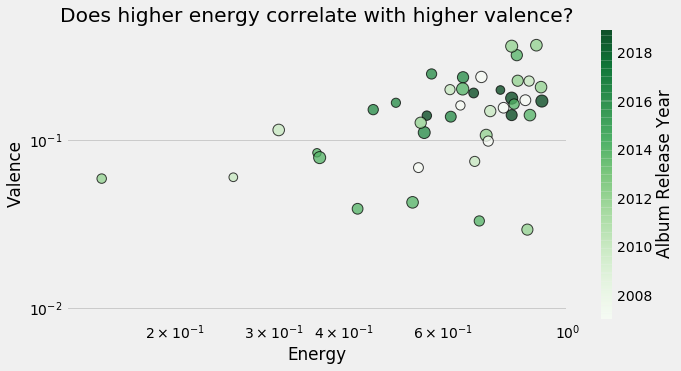

In [10]:
# scatter plot
album_release_year = np.array(df_final['album_release_year'])
album_name = df_final['album_name']
y = np.array(df_final['valence'])
x = np.array(df_final['energy'])
size = np.array(df_final['tempo'])
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
#s = dot size using tempo as a var
# alpha softens the colors
# c differentiates between the albums
plt.scatter(x, y, s=size, c=album_release_year, cmap='Greens',
            edgecolor='black', linewidth=1,alpha=0.75)
plt.xlabel('Energy')
plt.ylabel('Valence')
# rescale both variables to be on the same scale
plt.xscale('log')
plt.yscale('log')
plt.title('Does higher energy correlate with higher valence?')
# show the bar on thr right to display the what the colors are
cbar = plt.colorbar()
cbar.set_label('Album Release Year')
plt.show()